<a href="https://www.kaggle.com/code/sudhanshu2198/end-to-end-titanic-survival-prediction-app?scriptVersionId=120569094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
%matplotlib inline

# Titanic Survival Prediction App
**This project is deployed on streamlit as app, you should explore and play around with the app to experience the tremendous value addition by model deployment**

**[Titanic Survival Prediction App link](https://sudhanshu2198-titanic-survival-prediction-a-introduction-vigidy.streamlit.app/)**

**[Github Link](https://github.com/sudhanshu2198/Titanic-Survival-Prediction-App)**

# Data Summary

In [2]:
data=pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Name, Ticket, PassengerId are not useful feature useful, and cabin contains large no of missing values due to which it is not helpful**

# Data Cleaning

In [5]:
data=data.drop(columns=['Name','Ticket','PassengerId','Cabin'],axis=1)

change={"Pclass":"Class",
        "SibSp":"No_of_siblings",
        "Parch":"No_of_parents"}

data.rename(columns=change,inplace=True)

data["Survived"]=data["Survived"].map({0:"Not Survived",1:"Survived"})
data["Class"]=data["Class"].map({1:"Lower",2:"Middle",3:"Upper"})
data["Embarked"]=data["Embarked"].map({"C":"Cherbourg","Q":"Queenstown","S":"Southampton"})

data["No_of_siblings"]=data["No_of_siblings"].apply( lambda x: x if x<=4 else 4)
data["No_of_parents"]=data["No_of_parents"].apply( lambda x: x if x<=4 else 4)

data["Fare"].fillna(data["Fare"].median(),inplace=True)
data["Age"].fillna(data["Age"].median(),inplace=True)
data["Embarked"].fillna(method="ffill",inplace=True)

data.head()

,Survived,Class,Sex,Age,No_of_siblings,No_of_parents,Fare,Embarked
0,Not Survived,Upper,male,22.0,1,0,7.2500,Southampton
1,Survived,Lower,female,38.0,1,0,71.2833,Cherbourg
2,Survived,Upper,female,26.0,0,0,7.9250,Southampton
3,Survived,Lower,female,35.0,1,0,53.1000,Southampton
4,Not Survived,Upper,male,35.0,0,0,8.0500,Southampton


# Data Visualization

In [6]:
df=data["Class"].value_counts()
fig = px.pie(values=df.values, names=df.index, title='Survived Distribution')
fig.show()

In [7]:
df=data["Sex"].value_counts()
fig = px.pie(values=df.values, names=df.index, title='Survived Distribution')
fig.show()

In [8]:
df=data["Embarked"].value_counts()
fig = px.pie(values=df.values, names=df.index, title='Survived Distribution')
fig.show()

In [9]:
fig = px.histogram(data, x="Age")
fig.show()

In [10]:
fig = px.histogram(data, x="Fare")
fig.show()

In [11]:
fig = px.histogram(data, x="No_of_siblings")
fig.show()

In [12]:
fig = px.histogram(data, x="No_of_parents")
fig.show()

In [13]:
fig = px.scatter(data, x="Age", y="No_of_siblings",color="Survived")
fig.show()

In [14]:
df=data.groupby(["Class","Survived"])[["Sex"]].count().reset_index()
fig = px.bar(x=df["Class"], y=df["Sex"], color=df["Survived"], title="Long-Form Input")
fig.show()

In [15]:
df=data.groupby(["Sex","Survived"])[["Class"]].count().reset_index()
fig = px.bar(x=df["Sex"], y=df["Class"], color=df["Survived"], title="Long-Form Input")
fig.show()

In [16]:
df=data.groupby(["Embarked","Survived"])[["Class"]].count().reset_index()
fig = px.bar(x=df["Embarked"], y=df["Class"], color=df["Survived"], title="Long-Form Input")
fig.show()

In [17]:
fig = px.box(data, x="Sex", y="Age", color="Survived")
fig.show()

In [18]:
fig = px.box(data, x="Sex", y="Fare", color="Survived")
fig.show()

In [19]:
fig = px.box(data, x="Class", y="Age", color="Survived")
fig.show()

In [20]:
df=data.groupby(["Embarked","Class","Sex","Survived"])[["Fare"]].count().reset_index()
fig=px.treemap(df,path=['Embarked','Class','Survived'],values='Fare')
fig.show()

# Data Preprocessing

In [21]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

lencoder=LabelEncoder()
y=lencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,
                                                    random_state=42)

In [22]:
ohencoder=OneHotEncoder()
cat_df=ohencoder.fit_transform(X_train[['Class', 'Sex','Embarked']]).toarray()

num_df=X_train[['Age', 'No_of_siblings', 'No_of_parents','Fare']].values
X_train=np.concatenate((num_df, cat_df), axis=1)

In [23]:
cv=StratifiedKFold(n_splits=5)
scores=cross_val_score(RandomForestClassifier(random_state=42),X_train,y_train,scoring="accuracy",cv=cv)

print("RandomForest model accuracy is: {}\n".format(scores.mean()))
print("RandomForest model accuracy standard deviation is: {}".format(scores.std()))

RandomForest model accuracy is: 0.7993105486063232

RandomForest model accuracy standard deviation is: 0.05065020523833162


# Optimization

In [24]:
params={"n_estimators":list(range(80,150,10)),
         "max_depth":list(range(4,11)),
         "min_samples_split":list(range(2,6))}

search_grid=GridSearchCV(RandomForestClassifier(random_state=42),params,scoring="accuracy",
                         n_jobs=-1,cv=cv)
search_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 90, 100, 110, 120, 130, 140]},
             scoring='accuracy')

In [25]:
search_grid.best_score_

0.8315473259135231

In [26]:
search_grid.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 120}

# Prediction

In [27]:
model=search_grid.best_estimator_

In [28]:
cat_df=ohencoder.transform(X_test[['Class', 'Sex','Embarked']]).toarray()
num_df=X_test[['Age', 'No_of_siblings', 'No_of_parents','Fare']].values

X_test=np.concatenate((num_df, cat_df), axis=1)
y_pred=model.predict(X_test)

In [29]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



Text(70.72222222222221, 0.5, 'True Label')

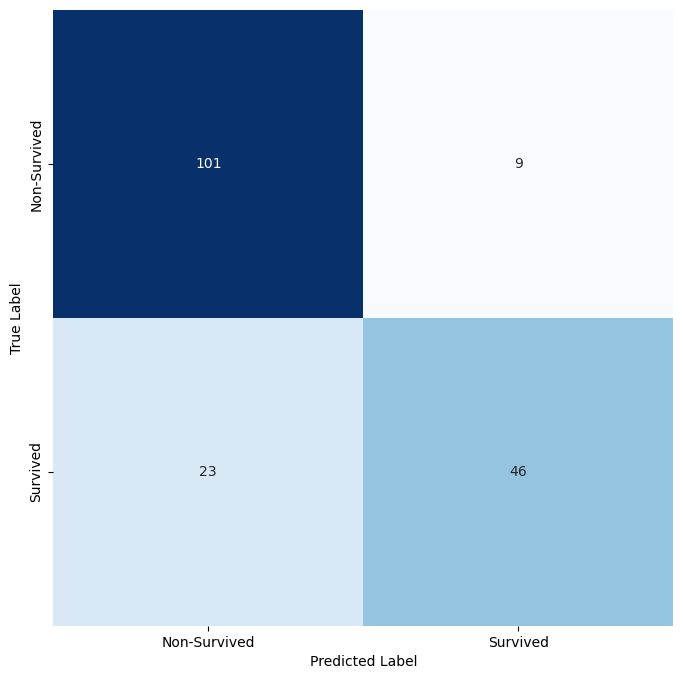

In [30]:
val=['Non-Survived','Survived']
data=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=val,index=val)
plt.figure(figsize=(8,8))

sns.heatmap(data,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Submission

In [31]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")

p_id=test['PassengerId']
test=test.drop(columns=['Name','Ticket','PassengerId','Cabin'],axis=1)

change={"Pclass":"Class",
        "SibSp":"No_of_siblings",
        "Parch":"No_of_parents"}

test.rename(columns=change,inplace=True)

test["Class"]=test["Class"].map({1:"Lower",2:"Middle",3:"Upper"})
test["Embarked"]=test["Embarked"].map({"C":"Cherbourg","Q":"Queenstown","S":"Southampton"})

test["No_of_siblings"]=test["No_of_siblings"].apply( lambda x: x if x<=4 else 4)
test["No_of_parents"]=test["No_of_parents"].apply( lambda x: x if x<=4 else 4)

test["Fare"].fillna(test["Fare"].median(),inplace=True)
test["Age"].fillna(test["Age"].median(),inplace=True)
test["Embarked"].fillna(method="ffill",inplace=True)

cat_df=ohencoder.transform(test[['Class', 'Sex','Embarked']]).toarray()
num_df=test[['Age', 'No_of_siblings', 'No_of_parents','Fare']].values

test=np.concatenate((num_df, cat_df), axis=1)

In [32]:
pred=model.predict(test)

In [33]:
submission=pd.DataFrame({'PassengerId':p_id,
                         "Survived":pred})
submission.to_csv("submission.csv",index=False)

# Model Persisting

In [34]:
pickle.dump(ohencoder,open("ohencoder.pkl","wb"))
pickle.dump(model,open("model.pkl","wb"))
pickle.dump(lencoder,open("lencoder.pkl","wb"))